# Homework #5

**See Canvas for HW #5 assignment due date**. Complete all of the following problems. Ideally, the theoretical problems should be answered in a Markdown cell directly underneath the question. If you don't know LaTex/Markdown, you may submit separate handwritten solutions to the theoretical problems. Please do not turn in messy work. Computational problems should be completed in this notebook (using the R kernel is preferred). Computational questions may require code, plots, analysis, interpretation, etc. Working in small groups is allowed, but it is important that you make an effort to master the material and hand in your own work. 



## A. Theoretical Problems

### Problem A.1

Assume the standard MLR model: for $i = 1,...,n$, $$Y_i = \beta_0 + \beta_1X_{i,1} + ... + \beta_pX_{i,p} + \varepsilon_i,$$ where ${\varepsilon}_i \overset{iid}{\sim}N(0,\sigma^2)$. For simplicity, let's assume that $\sigma^2$ is known. The goal of this question is to show that the least squares estimator is equivalent to the maximum likelihood estimator.

#### (a) Write down the (marginal) pdf of $Y_i$. Call it $f\big(y_i; \, \mu(\boldsymbol\beta), \, \sigma^2 \,\big)$. (HINT: what's the mean and variance of $Y_i$?).


from hereon we will refer to the fitted value given a set of $x_i$'s as $y_{fit}$. We know this is a normal distribution with variance $\sigma^2$ then: $f_y(y_i; \mu(\beta), \sigma^2) = \frac{1}{\sigma \sqrt{2 \pi}} exp(\frac{-1}{2} (\frac{y_i - y_{fit}}{\sigma})^2)$

#### (b) Write down the joint pdf of $(Y_1,...,Y_n)$, and simplify your expression using laws for exponentials.  Call it $f_\mathbf{y}\big(\mathbf{y}; \, \mu(\boldsymbol\beta), \, \sigma^2 \,\big)$. (HINT: use the fact that independence allows you to multiply the marginal distributions together.)

We know that $y_i$ is normaly distributed with $\mu = y_{fit}$ so the pdf is $f_y(y_i; \mu(\beta), \sigma^2) = \frac{1}{(2 \pi)^{\frac{n}{2}} \sigma^n} exp(\frac{-1}{2 \sigma^2} (\sum_{i=1}^{n} (y_i - y_{fit})^2))$

#### (c) The *likelihood function* is the joint pdf of $(Y_1,...,Y_n)$, interpreted as a function of the *parameters* rather than as a function of the data. We might denote the likelihood function as $L(\boldsymbol\beta \, | \mathbf{y} )$ to emphasize that it is a function of the parameters given the data. Write down the log of the likelihood function. Call it $\ell(\boldsymbol\beta \, | \mathbf{y} )$.

Convince yourself that the value of $\boldsymbol\beta$ that maximizes $L$ is the same as the value of $\boldsymbol\beta$ that maximizes $\ell$.

$L(\beta | y) = f_y$ therefor $\ell (\beta |y) = log(\frac{1}{(2 \pi)^{\frac{n}{2}} \sigma^n}) \cdot \frac{-1}{2 \sigma^2} (\sum_{i=1}^{n} (y_i - y_{fit})^2)$

#### (d) Argue that the maximum likelihood estimator is equivalent to the least squares estimator in this context.

The way to minimize the function above to minimize the term $\sum_{i=1}^{n} (y_i - y_{fit})^2$ which as we have gone over in previous homework is exactly the same goal as least squares estimator, hence the name.

## B. Computational Problems

### Problem B.1

#### For the teengamb data, fit a model with gamble as the response and the other variables as predictors. Look for violations of:

1. Constant Variance
2. Normality
3. Linearity
4. **STAT 5510 Only: Look for (a) outliers, (b) leverage points, and (b) potentially influential points. This part of the problem requires some self-study about defining and identifying leverage points, and describing the relationship between leverage and influence. Chapter 6 of *Linear Models with R* (pdf on Canvas) may help!**

#### Write a short report detailing your findings.

In [2]:
library(tidyverse)
data(teengamb, package = "faraway")
head(teengamb)
summary(teengamb)

sex,status,income,verbal,gamble
1,51,2.00,8,0.0
1,28,2.50,8,0.0
1,37,2.00,6,0.0
1,28,7.00,4,7.3
1,65,2.00,8,19.6
1,61,3.47,6,0.1


      sex             status          income           verbal     
 Min.   :0.0000   Min.   :18.00   Min.   : 0.600   Min.   : 1.00  
 1st Qu.:0.0000   1st Qu.:28.00   1st Qu.: 2.000   1st Qu.: 6.00  
 Median :0.0000   Median :43.00   Median : 3.250   Median : 7.00  
 Mean   :0.4043   Mean   :45.23   Mean   : 4.642   Mean   : 6.66  
 3rd Qu.:1.0000   3rd Qu.:61.50   3rd Qu.: 6.210   3rd Qu.: 8.00  
 Max.   :1.0000   Max.   :75.00   Max.   :15.000   Max.   :10.00  
     gamble     
 Min.   :  0.0  
 1st Qu.:  1.1  
 Median :  6.0  
 Mean   : 19.3  
 3rd Qu.: 19.4  
 Max.   :156.0  


Call:
lm(formula = gamble ~ verbal + income + status + sex, data = teengamb)

Residuals:
    Min      1Q  Median      3Q     Max 
-51.082 -11.320  -1.451   9.452  94.252 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  22.55565   17.19680   1.312   0.1968    
verbal       -2.95949    2.17215  -1.362   0.1803    
income        4.96198    1.02539   4.839 1.79e-05 ***
status        0.05223    0.28111   0.186   0.8535    
sex         -22.11833    8.21111  -2.694   0.0101 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 22.69 on 42 degrees of freedom
Multiple R-squared:  0.5267,	Adjusted R-squared:  0.4816 
F-statistic: 11.69 on 4 and 42 DF,  p-value: 1.815e-06


Warning message:
"`stat` is deprecated"`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'


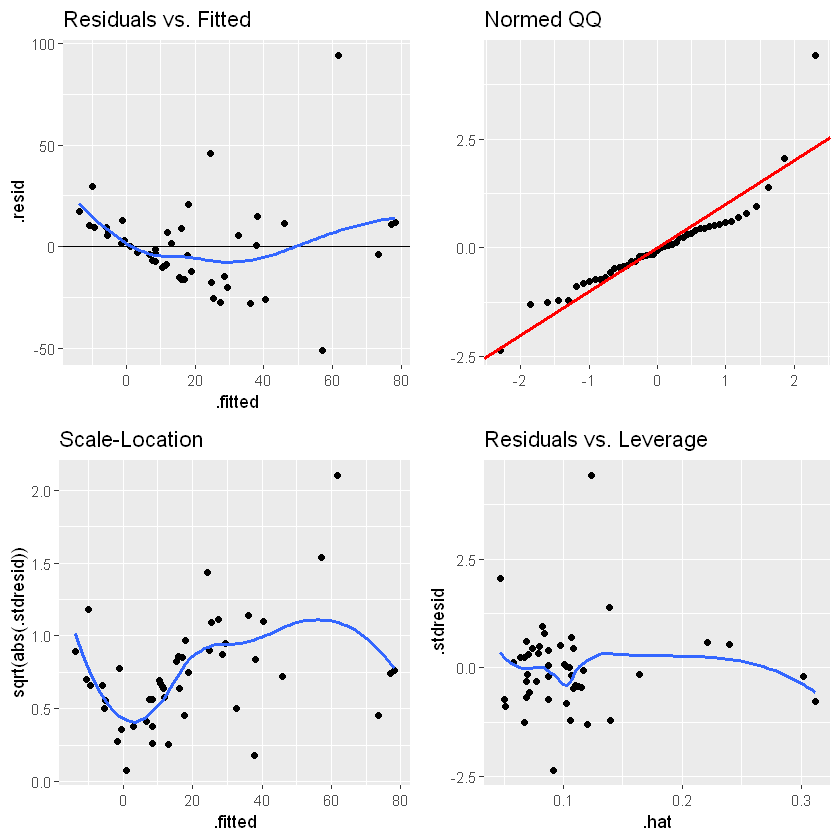

In [7]:
lmodGamb = lm(data = teengamb, gamble~verbal + income + status + sex)
summary(lmodGamb)
library(gridExtra)
p1 <- qplot(data = lmodGamb, x = .fitted, y = .resid) + geom_hline(yintercept = 0) + geom_smooth(se = FALSE) + ggtitle('Residuals vs. Fitted')
p2 <- qplot(data = lmodGamb, sample =.stdresid, stat = "qq") + geom_abline(size = 1, color = 'red') + ggtitle('Normed QQ')
p3 <- qplot(data = lmodGamb, x = .fitted, y = sqrt(abs(.stdresid))) + geom_smooth(se = FALSE) + ggtitle('Scale-Location')
p4 <- qplot(data = lmodGamb, .hat, .stdresid) + geom_smooth(se = FALSE) + ggtitle('Residuals vs. Leverage')
grid.arrange(p1,p2,p3,p4)

The linear model seems to have some issues. The variance does not appear to be constant as seen in the scale location plot the data that falls below 20 on the fitted axis does not seem to have a horizontal line close to 1 which what we would expect to see for the standarized residuals of homoskedastic data. The normality assumption seems to hold for the values where the fitted data is greater than 20. The lower end of the data is all clustered above the y = 0 line, clearly not normal, but on the higher end of the fitted values the normality assumption seems to hold, abiet with non-constant variance, because there seems to be an interaction term between the error and fitted parameters. Lastly there does not seem to be clear evidence about the normality assumption. The middle part of the QQ plot shows data cluster around the line, but the high and low ends diverge enough that normality is probably violated. If I were to fit a linear model again I would try a reduced model with just income and sex as predictors and see if this eliminated some of the issues that this model seems to have.


Call:
lm(formula = gamble ~ income + sex, data = teengamb)

Residuals:
    Min      1Q  Median      3Q     Max 
-49.757 -11.649   0.844   8.659 100.243 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    4.041      6.394   0.632  0.53070    
income         5.172      0.951   5.438 2.24e-06 ***
sex          -21.634      6.809  -3.177  0.00272 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 22.75 on 44 degrees of freedom
Multiple R-squared:  0.5014,	Adjusted R-squared:  0.4787 
F-statistic: 22.12 on 2 and 44 DF,  p-value: 2.243e-07


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
42,21623.77,NA,NA,NA,NA
44,22781.32,-2,-1157.553,1.124162,0.3345045


Warning message:
"`stat` is deprecated"`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'


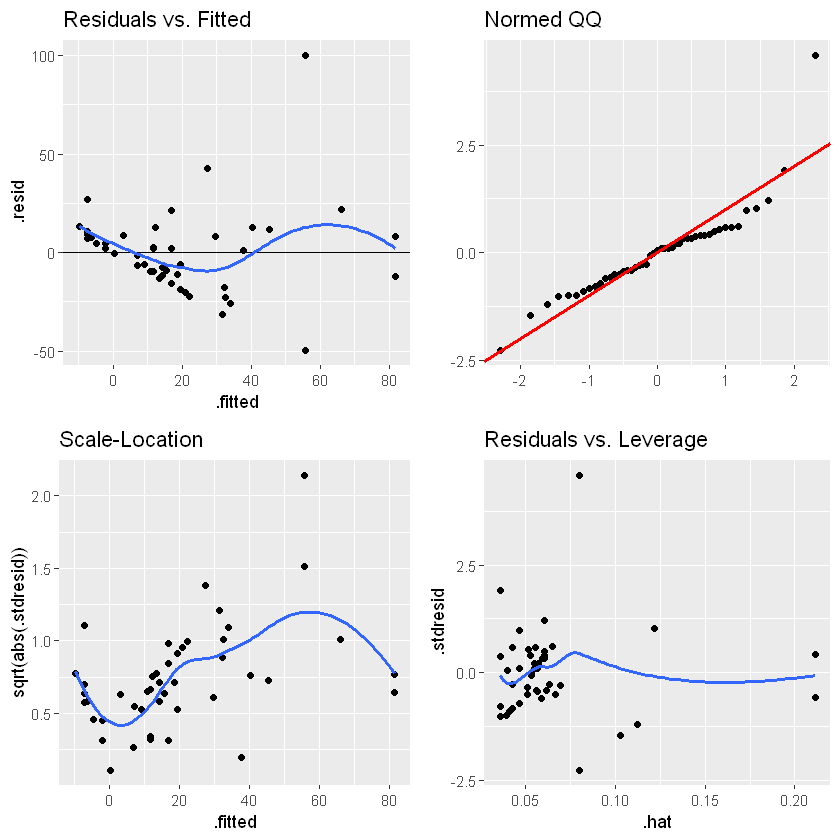

In [10]:
lmodGambRed = lm(data = teengamb, gamble~ income + sex)
summary(lmodGambRed)
anova(lmodGamb,lmodGambRed)
p1 <- qplot(data = lmodGambRed, x = .fitted, y = .resid) + geom_hline(yintercept = 0) + geom_smooth(se = FALSE) + ggtitle('Residuals vs. Fitted')
p2 <- qplot(data = lmodGambRed, sample =.stdresid, stat = "qq") + geom_abline(size = 1, color = 'red') + ggtitle('Normed QQ')
p3 <- qplot(data = lmodGambRed, x = .fitted, y = sqrt(abs(.stdresid))) + geom_smooth(se = FALSE) + ggtitle('Scale-Location')
p4 <- qplot(data = lmodGambRed, .hat, .stdresid) + geom_smooth(se = FALSE) + ggtitle('Residuals vs. Leverage')
grid.arrange(p1,p2,p3,p4)

### Problem B.2

This [link](https://www.colorado.edu/amath/sites/default/files/attached-files/advertising.txt) contains advertising data. This dataset contains, in thousands of dollars, TV, Radio, and Newspaper budgets for 200 different markets along with the Sales, in thousands of units, for each market.

#### (a) Fit the SLR model with sales as the response and radio as the predictor and save as ${\tt slrmod}$. Perform some diagnostic tests to see whether any SLR assumptions have been violated. Explain your findings.

In [8]:
adv = read.csv("https://www.colorado.edu/amath/sites/default/files/attached-files/advertising.txt", sep = "")

Warning message:
"`stat` is deprecated"`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'


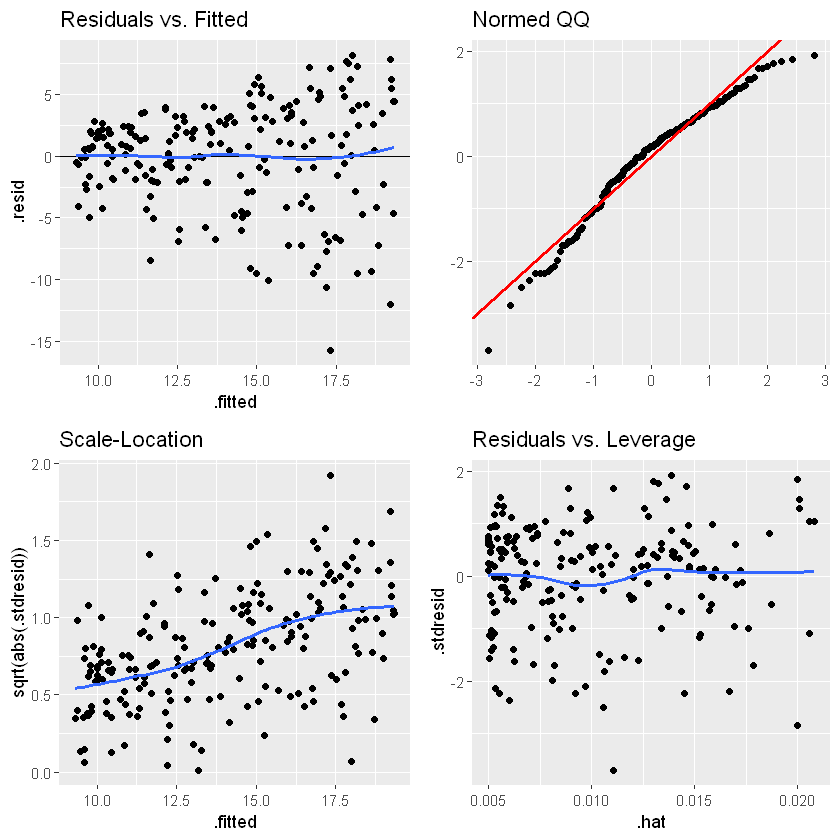

In [80]:
slrmod = lm(data = adv, sales ~ radio)
p1 <- qplot(data = slrmod, x = .fitted, y = .resid) + geom_hline(yintercept = 0) + geom_smooth(se = FALSE) + ggtitle('Residuals vs. Fitted')
p2 <- qplot(data = slrmod, sample =.stdresid, stat = "qq") + geom_abline(size = 1, color = 'red') + ggtitle('Normed QQ')
p3 <- qplot(data = slrmod, x = .fitted, y = sqrt(abs(.stdresid))) + geom_smooth(se = FALSE) + ggtitle('Scale-Location')
p4 <- qplot(data = slrmod, .hat, .stdresid) + geom_smooth(se = FALSE) + ggtitle('Residuals vs. Leverage')
grid.arrange(p1,p2,p3,p4)

In [17]:
shapiro.test(residuals(slrmod))


	Shapiro-Wilk normality test

data:  residuals(slrmod)
W = 0.96072, p-value = 2.367e-05


This linear model seems to have less issues than the first problem. The variance assumption seems to be violated as shown by the residuals vs fitted plot were variance grows as the fitted values do. However the normality assumption seems somewhat supported as seen by the scale location plot on the higher end centered around y = 1 and the Shapiro Wilk test both of which suggest a normal distribution. The linearity assumption seems somewhat supported by the QQ plot.

#### (b) Produce a plot that isolates the effect of TV on sales (adjusting for radio). What does this plot suggest about the relationship between these two variables?

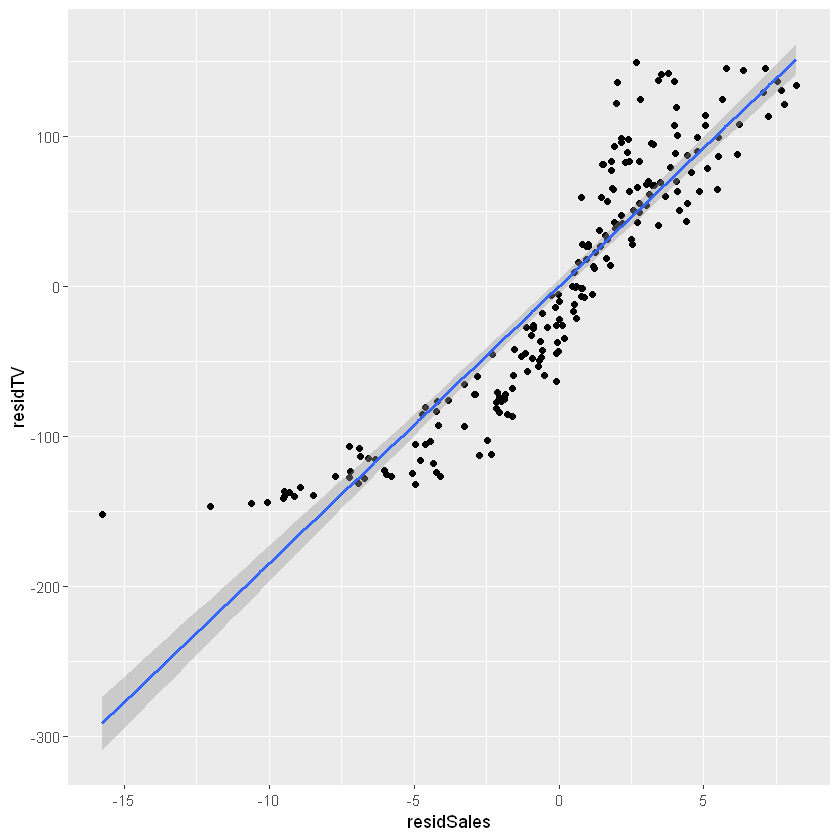

In [102]:
slrmodTV = lm(data = adv, TV ~ radio)
residSales = residuals(slrmod)
residTV = residuals(slrmodTV)
resdf = as.data.frame(cbind(residSales, residTV))
ggplot(data = resdf, aes(x = residSales, y = residTV))+geom_point() + geom_smooth(method = 'lm', formula = y~x)

There is a clear deviation from the normality assumption, ie the data is not clustered evenly above and below the line with even variance

#### (c) Produce a plot that isolates the effect of newspaper on sales (adjusting for radio). What does this plot suggest about the relationship between these two variables?

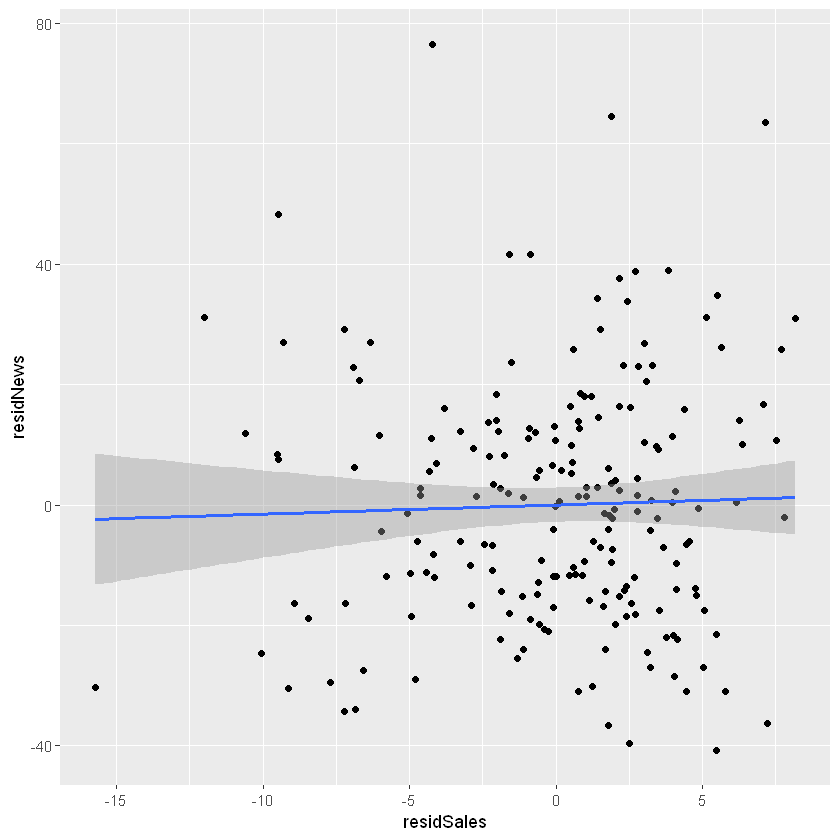

In [94]:
slrmodNews = lm(data = adv, newspaper ~ radio)
residSales = residuals(slrmod)
residNews = residuals(slrmodNews)
resdf = as.data.frame(cbind(residSales, residNews))
ggplot(data = resdf, aes(x = residSales, y = residNews))+geom_point() + geom_smooth(method = 'lm', formula = y~x)

This data shows constant variance around the line y = 0 so the interaction term is likely 0 or close enough that it is a safe approximation.

#### (d) Fit the MLR model that includes radio and TV, and save as ${\tt mlrmod}$. Does the inclusion of this predictor fix any issues that you dioagnosed in part (a)? Does it add any other issues?

Warning message:
"`stat` is deprecated"`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'


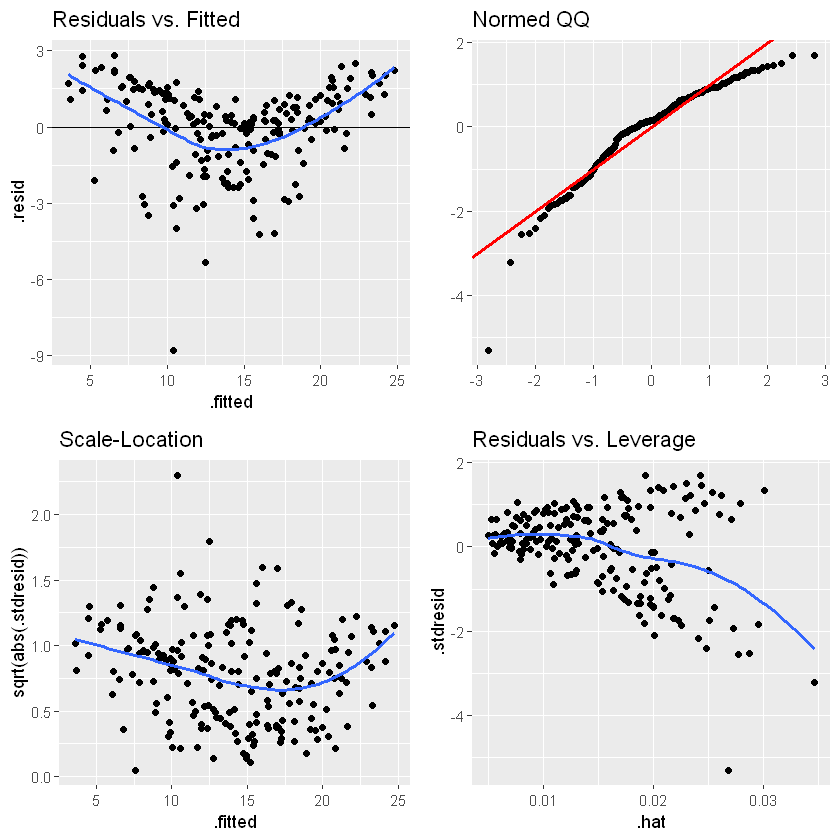

In [26]:
mlrmod = lm(data = adv, sales ~ TV + radio)
p1 <- qplot(data = mlrmod, x = .fitted, y = .resid) + geom_hline(yintercept = 0) + geom_smooth(se = FALSE) + ggtitle('Residuals vs. Fitted')
p2 <- qplot(data = mlrmod, sample =.stdresid, stat = "qq") + geom_abline(size = 1, color = 'red') + ggtitle('Normed QQ')
p3 <- qplot(data = mlrmod, x = .fitted, y = sqrt(abs(.stdresid))) + geom_smooth(se = FALSE) + ggtitle('Scale-Location')
p4 <- qplot(data = mlrmod, .hat, .stdresid) + geom_smooth(se = FALSE) + ggtitle('Residuals vs. Leverage')
grid.arrange(p1,p2,p3,p4)

The MLR model seems to have fixed one problem at the expense of another. The scale location plot looks more data clustered around the y = 1 line, but the constant variance assumption is no better, and trying to scale the error terms no longer looks like a straightforward problem because there does not appear to be a constant interaction term between the fitted and residual values. The QQ plot looks basically the same so the linearity assumption is somewhat supported.

#### (e) Add TV^2 to the MLR model in part (d) and save as ${\tt mlrmodsq}$. How did this change the fit of the model? What conclusions might you draw?

Warning message:
"`stat` is deprecated"`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'


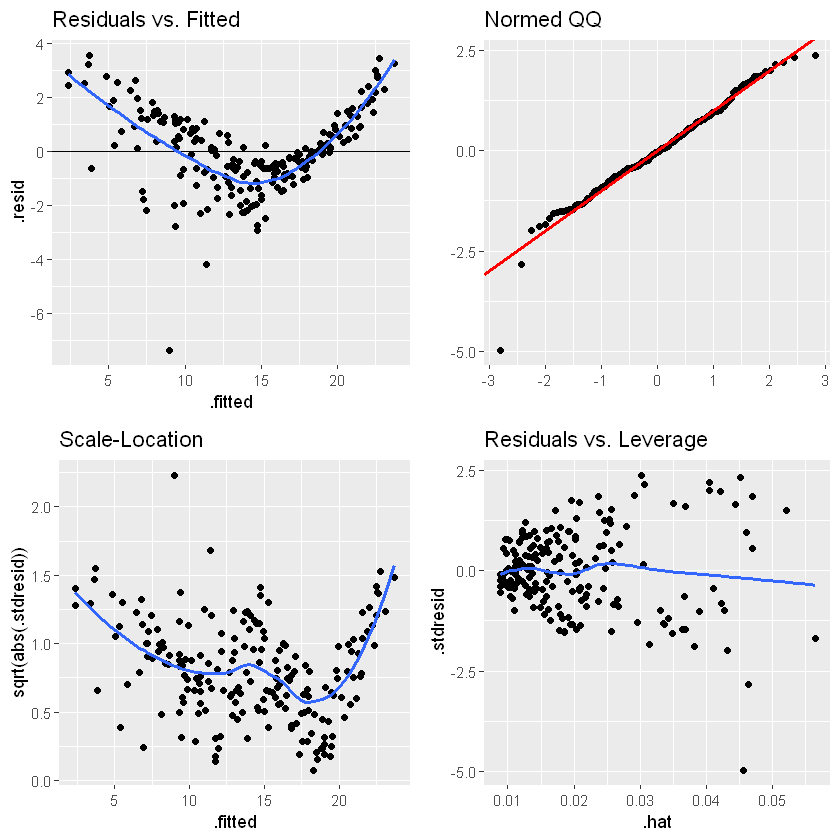

In [27]:
mlrmodsq = lm(data = adv, sales ~ TV + radio + I(TV^2))
p1 <- qplot(data = mlrmodsq, x = .fitted, y = .resid) + geom_hline(yintercept = 0) + geom_smooth(se = FALSE) + ggtitle('Residuals vs. Fitted')
p2 <- qplot(data = mlrmodsq, sample =.stdresid, stat = "qq") + geom_abline(size = 1, color = 'red') + ggtitle('Normed QQ')
p3 <- qplot(data = mlrmodsq, x = .fitted, y = sqrt(abs(.stdresid))) + geom_smooth(se = FALSE) + ggtitle('Scale-Location')
p4 <- qplot(data = mlrmodsq, .hat, .stdresid) + geom_smooth(se = FALSE) + ggtitle('Residuals vs. Leverage')
grid.arrange(p1,p2,p3,p4)

Again this has solved one problem at the expense of making another worse. The constant variance assumption is even more clearly violated, but the data is tightly clustered around the y = x line so the linearity assumption is much more strongly supported. The linearity assumption is more important than the constant variance one so the model with the quadradic term is likely the better option.

### Problem B.3 

Researchers at the National Institutes of Standards and Technology (NIST) collected pipline data on ultrasonic measurements of the depth of defects in the Alaska pipeline in the field. The depths of the defects were then remeasured in the laboratory. The laboratory measurements are more accurate than the field measurements, but more time consuming and expensive. We want to develop a regression model for correcting the in field measurements. 

#### (a) Fit a regression model where Lab is the response and Field is the predictor and save this model as ${\tt lmodPipeline}$. Check for non-constant variance. 

Warning message:
"`stat` is deprecated"`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'


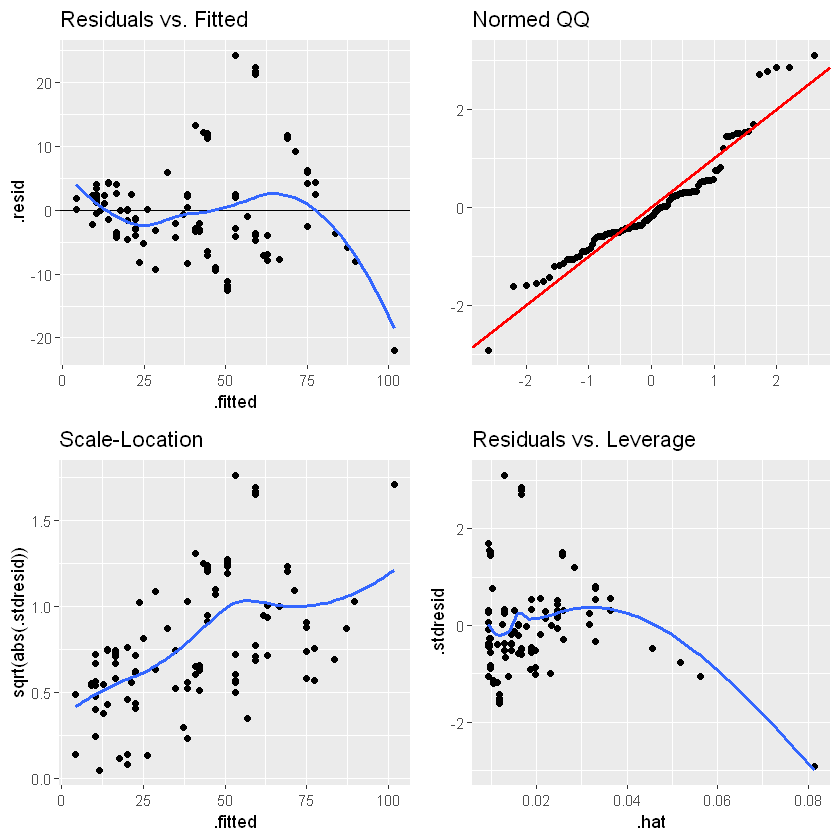

In [51]:
pipeline = read.table("pipeline.txt", header = TRUE, sep = "")
lmodPipeline = lm(data = pipeline, Lab~Field)
p1 <- qplot(data = lmodPipeline, x = .fitted, y = .resid) + geom_hline(yintercept = 0) + geom_smooth(se = FALSE) + ggtitle('Residuals vs. Fitted')
p2 <- qplot(data = lmodPipeline, sample =.stdresid, stat = "qq") + geom_abline(size = 1, color = 'red') + ggtitle('Normed QQ')
p3 <- qplot(data = lmodPipeline, x = .fitted, y = sqrt(abs(.stdresid))) + geom_smooth(se = FALSE) + ggtitle('Scale-Location')
p4 <- qplot(data = lmodPipeline, .hat, .stdresid) + geom_smooth(se = FALSE) + ggtitle('Residuals vs. Leverage')
grid.arrange(p1,p2,p3,p4)

The constant variance assumption is clearly violated as shown by the residuals vs. fitted plot. data should be clusted around y = 0 with a consistant normal spread away from that line. 

#### (b) Sometimes transforming the response and predictor helps in stabilizing variance. Find a transformation on Lab and/or Field so that in the transformed scale the relationship is approximately linear with constant variance. Restrict your choice of transformation to square root, log, and inverse. Save your transformed variables as ${\tt pipeline$LabTransform}$ and ${\tt pipeline$FieldTransform}$. Then, regress the transformed Lab variable (repsonse) onto the transformed field variable (predictor), and save this as ${\tt lmodTr}$.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



Call:
lm(formula = LabTransform ~ FieldTransform, data = pipeline)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.40212 -0.11853 -0.03092  0.13424  0.40209 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -0.06849    0.09305  -0.736    0.463    
FieldTransform  1.05483    0.02743  38.457   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1837 on 105 degrees of freedom
Multiple R-squared:  0.9337,	Adjusted R-squared:  0.9331 
F-statistic:  1479 on 1 and 105 DF,  p-value: < 2.2e-16


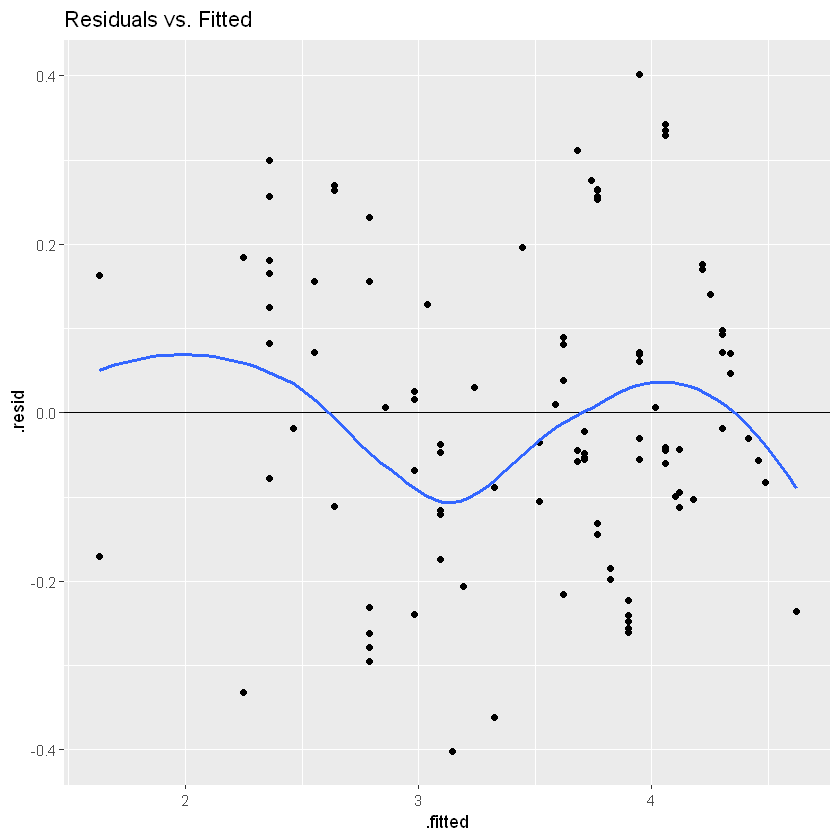

In [73]:
lmodPipeline2 = lm(data = pipeline, log(Lab) ~ log(Field))
qplot(data = lmodPipeline2, x = .fitted, y = .resid) + geom_hline(yintercept = 0) + geom_smooth(se = FALSE) + ggtitle('Residuals vs. Fitted')
pipeline$LabTransform = log(pipeline$Lab)
pipeline$FieldTransform = log(pipeline$Field)
lmodTr = lm(data = pipeline, LabTransform ~ FieldTransform)
summary(lmodTr)

#### (c) Now let's try weighted least squares. The code below splits the range of Field into 12 groups of size nine (except for the last goup which has only eight values). Within each group, we compute the variance of Lab as varlab and the mean of Field as meanfield. Write comments for each line of the code to demonstrate what each line is doing.

In [74]:
i = order(pipeline$Field); 
npipe = pipeline[i,]; 
ff = gl(12,9)[-108];  
meanfield = unlist(lapply(split(npipe$Field,ff),mean));  
varlab = unlist(lapply(split(npipe$Lab,ff),var)); 

The first line orders the Field vector from greatest to least.
The second line then brings all the data from the pipeline dataframe back in to form the new dataframe npipe.
The third line generates a list of 108 factors into 12 levels, each with 9 observations.
The fourth line then splits the Field vector of npipe by the factor level and the apply function is used to calculate the mean for each level, and then these means are gathered into the vector meanfield.
The fifth line follows the same procedure as the fourth, but instead calculates the variance of each level.

#### (d) Suppose that the variance in the repsonse is linked to the predictor in the following way: $$ Var(Lab) = a_0Field^{a_2}.$$ Use simple linear regression on (transformations of) varlab and meanfield to estimate $a_0$ and $a_1$. Call this regression ${\tt lmodVar}$.Use these estimates to perform weighted least squares where the weights are the inverse of the variance of Lab. Call this regression ${\tt lmodwls}$.  Print a summary of this model and comment on the fit.

In [ ]:
#YOUR CODE HERE
fail() # No Answer - remove if you provide an answer

In [ ]:
#YOUR CODE HERE
fail() # No Answer - remove if you provide an answer

In [ ]:
#YOUR CODE HERE
fail() # No Answer - remove if you provide an answer

YOUR ANSWER HERE